In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
from grades import load_grades, ta_stats, to_pandas

grades, rubric, questions = load_grades("rubrics/checkin-fa21.json", "data/testing", only_submitted=True)
grades_df = to_pandas(grades)


== Loading grades for assignment 'rubrics/checkin-fa21.json' ==
 - Loaded question: 2_Papanek_Do-it-Your data/testing/2_Papanek_Do-it-Yourself_Murder.csv
      21
 - Loaded question: 5_Gaver_and_Martin_A data/testing/5_Gaver_and_Martin_Alternatives_exploring.csv
      21
 - Loaded question: 6_Gaver_and_Dunne_Pr data/testing/6_Gaver_and_Dunne_Projected_realities.csv
      1
 - Loaded question: 10_Edgerton_Signific data/testing/10_Edgerton_Significance.csv
      20
 - Loaded question: 3_Flanagan_et_al_Emb data/testing/3_Flanagan_et_al_Embodying_Values_in_Tech.csv
      1
 - Loaded question: 8_Bleecker_Part_1_De data/testing/8_Bleecker_Part_1_Design_Fiction_pp_3-8_o.csv
      22
 - Loaded question: 7_Gaver_and_Bowers_A data/testing/7_Gaver_and_Bowers_Annotated_Portfolios.csv
      1
 - Loaded question: 9_Pierce_and_Paulos_ data/testing/9_Pierce_and_Paulos_Some_variations_on_a_.csv
      24
 - Loaded question: 11_Scott_High-Modern data/testing/11_Scott_High-Modernist_City.csv
      1
 - L

In [10]:
# Print loaded grades
grades_df

,name,sid,aid,qid,email,comments,question,grader,Selected,Submitted,...,Design,Reflections,Reflection Quality,adjustment,total_score,was_submitted,inc_score,errors,url,late
0,Testy Testalot,666,85650952,749690264,robotic@gmail.com,NaN,2_Papanek_Do-it-Your,Xiaoyan Li,0,2,...,6.0,5.0,2,0,20.0,True,False,[Comment is blank after all rubric items were ...,https://www.gradescope.com/courses/228839/assi...,0.0
1,Testy7 Testalot7,-1,85709237,750067701,testy7@example.com,This is a creative design. You could provide m...,2_Papanek_Do-it-Your,Xiaoyan Li,0,2,...,5.5,4.5,1,0,18.0,True,False,"[Comment contains the word 'you.', 'Was submit...",https://www.gradescope.com/courses/228839/assi...,0.0
2,Testy16 Testalot16,-1,85710693,750080106,testy16@example.com,NaN,2_Papanek_Do-it-Your,Alex Jialin Shen,0,2,...,0.0,0.0,0,0,2.0,True,True,[No score entered for rubric item: Idea from t...,https://www.gradescope.com/courses/228839/assi...,0.0
3,Testy18 Testalot18,-1,85710697,750080138,testy18@example.com,NaN,2_Papanek_Do-it-Your,NaN,0,0,...,0.0,0.0,0,0,0.0,True,True,[],https://www.gradescope.com/courses/228839/assi...,0.0
4,Testy8 Testalot8,-1,85710721,750080301,testy8@example.com,NaN,2_Papanek_Do-it-Your,NaN,0,0,...,0.0,0.0,0,0,0.0,True,True,[],https://www.gradescope.com/courses/228839/assi...,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,Testy25 Testalot25,-1,85714974,750111300,testy25@example.com,NaN,9_Pierce_and_Paulos_,NaN,0,0,...,0.0,0.0,0,0,0.0,True,True,[],https://www.gradescope.com/courses/228839/assi...,0.0
111,Testy25 Testalot25,-1,85714974,750111302,testy25@example.com,NaN,11_Scott_High-Modern,NaN,0,0,...,0.0,0.0,0,0,0.0,True,True,[],https://www.gradescope.com/courses/228839/assi...,0.0
112,Testy Testalot,666,85650952,749690263,robotic@gmail.com,NaN,1_Nissenbaum_How_Com,Ian Arawjo,0,2,...,6.0,5.0,2,0,20.0,True,False,[Comment is blank after all rubric items were ...,https://www.gradescope.com/courses/228839/assi...,0.0
113,Testy25 Testalot25,-1,85714974,750111292,testy25@example.com,NaN,1_Nissenbaum_How_Com,NaN,0,0,...,0.0,0.0,0,0,0.0,True,True,[],https://www.gradescope.com/courses/228839/assi...,0.0


# Grader score violin plot

In [4]:
def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Grader Name')

# create test data
graders_scores = ta_stats(grades)
data = np.array([np.array(sorted(s)) for _, s in graders_scores.items()])
total_mean = np.median(np.hstack(data))

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 5), sharey=True)

ax1.set_title('TA Score Distribution')
ax1.set_ylabel('Scores')
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
ax1.violinplot(data)

plt.axhline(y=total_mean, color='k', linestyle='dashed', linewidth=1)

# set style for the axes
labels = [g for g, _ in graders_scores.items()]
for ax in [ax1]:
    set_axis_style(ax, labels)

plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()

<ipython-input-4-25ece5d231fb>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([np.array(sorted(s)) for _, s in graders_scores.items()])


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 4 and the array at index 1 has size 2

# Average Scores Given per Grader

<AxesSubplot:xlabel='grader'>

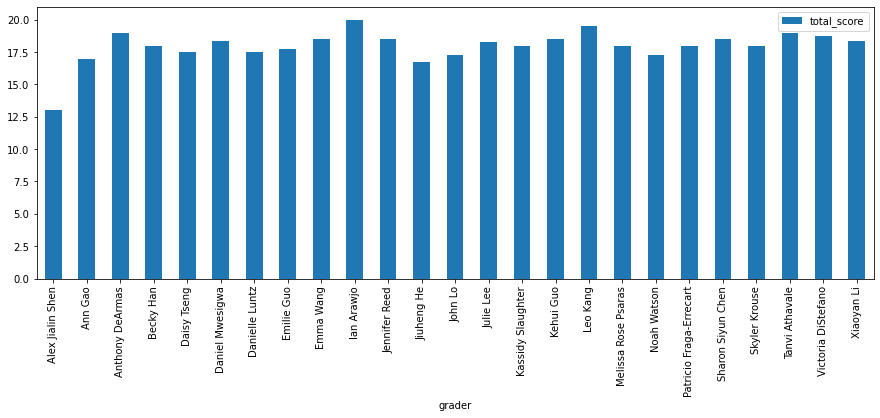

In [5]:
grades_df.groupby('grader').mean()[['total_score']].plot.bar(figsize=(15,5), rot=90)

# Average Scores per Question

<AxesSubplot:xlabel='question'>

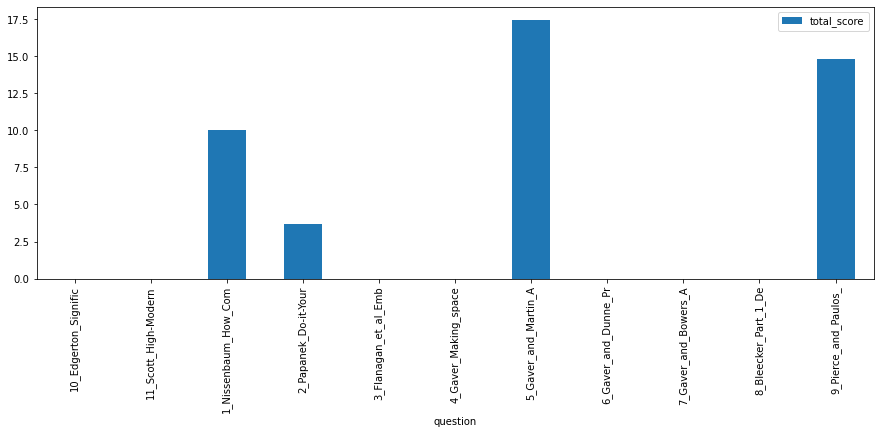

In [11]:
grades_df.groupby('question').mean()[['total_score']].plot.bar(figsize=(15,5), rot=90)

# Distribution of Final Scores

<AxesSubplot:ylabel='Frequency'>

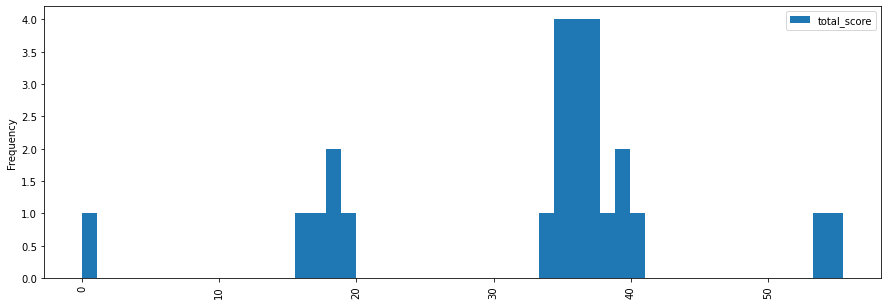

In [8]:
# Plot distribution of final scores
grades_df.groupby('email').sum()[['total_score']].plot.hist(figsize=(15,5), rot=90, bins=50)

## Letter Grade Distribution

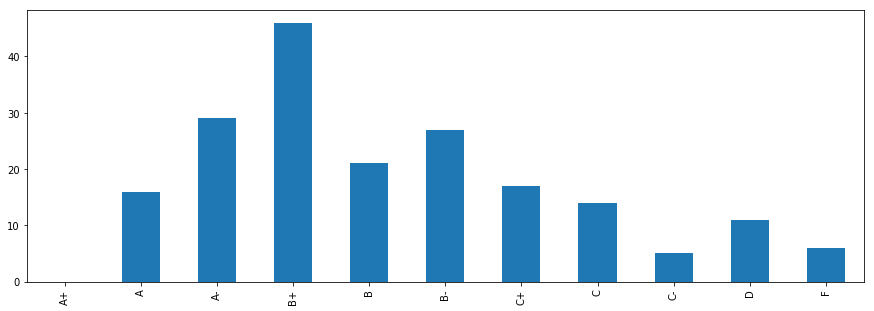

In [46]:
# Edit the highest score per assignment
max_score = rubric['maxScore']
grades = {
    98: "A+",
    95: "A",
    92: "A-",
    88: "B+",
    85: "B",
    82: "B-",
    78: "C+",
    75: "C",
    72: "C-",
    60: "D",
    0: "F"
}

def grade_mapping(value):
    perc = 100 * value / max_score
    for key, letter in grades.items():
        if perc >= key:
            return letter
        
letter_grades = grades_df.groupby('sid').sum()['total_score'].map(grade_mapping)
# final_data["Final Grade"] = pd.Categorical(
#     letter_grades, categories=grades.values(), ordered=True
# )
letters = list(grades.values())
letter_grades.value_counts()[letters].plot(kind='bar', figsize=(15,5))